Create a dataset for finding steamy images
--

Images have been pre-classified and put into one of two folders - clear and steam. For images in each folder, calculate the metrics and load into a dataframe.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

In [2]:
def hist_wid(hist):
    minnonz = np.flatnonzero(hist).min()
    maxnonz = np.flatnonzero(hist).max()
    return (maxnonz - minnonz)

In [3]:
def hist_std(hist):
    std = np.std(np.flatnonzero(hist))
    return (std)

In [4]:
def hist_max(hist):
    max = np.argmax(hist)
    return (max)

In [5]:
def imfdtstr(imfile):
    #gets the datetime of an image file named like 20180101001002WIWR.jpg as a string, for labelling only
    dt = imfile[:14]
    return (dt)

In [6]:
cleardir  = '/home/ruma/geonet/volcam_images/crop/clarity/clear'
steamdir = '/home/ruma/geonet/volcam_images/crop/clarity/steam'

**clear**

In [30]:
clear = pd.DataFrame()

for file in sorted(os.listdir(cleardir)):
        if file.endswith('.jpg'):
            #print (file)
            imfile = os.path.join(cleardir, file)
            img = cv2.imread(imfile)
            imtime = imfdtstr(file)
            #calculate histogram
            hist = cv2.calcHist([img],[0],None,[256],[0,256])
            wid = hist_wid(hist) #width
            std = hist_std(hist) #standard deviation
            hmax = hist_max(hist) #index of maximum
            clarity = 'clear'
            d = {'wid':wid, 'std':std, 'hmax':hmax, 'type':clarity}
            df = pd.DataFrame(d, index=[imtime])
            clear = clear.append(df)

**steam**

In [34]:
steam = pd.DataFrame()

for file in sorted(os.listdir(steamdir)):
        if file.endswith('.jpg'):
            #print (file)
            imfile = os.path.join(steamdir, file)
            img = cv2.imread(imfile)
            imtime = imfdtstr(file)
            #calculate histogram
            hist = cv2.calcHist([img],[0],None,[256],[0,256])
            wid = hist_wid(hist) #width
            std = hist_std(hist) #standard deviation
            hmax = hist_max(hist) #index of maximum
            clarity = 'steam'
            d = {'wid':wid, 'std':std, 'hmax':hmax, 'type':clarity}
            df = pd.DataFrame(d, index=[imtime])
            steam = steam.append(df)

**merge clear and steam and save**

In [70]:
frames = [clear, steam]
result = pd.concat(frames)
result.to_csv('image_data.csv', columns=['wid', 'std', 'type'])

**plot width**

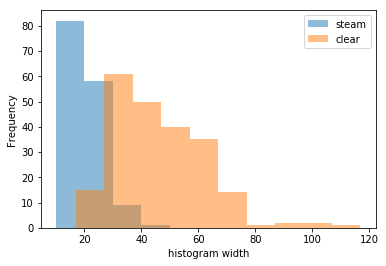

In [61]:
bins=np.arange(10,120, 10)
wid = steam['wid'].plot.hist(alpha=0.5, bins=bins, label='steam')
clear['wid'].plot.hist(ax=wid, alpha=0.5, label='clear')
wid.set_xlabel('histogram width')
wid.legend(loc='best')

**plot standard deviation**

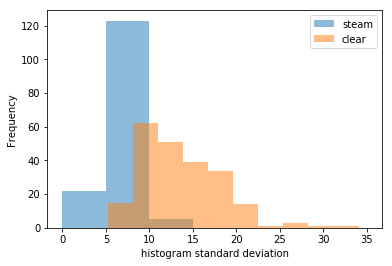

In [64]:
bins=np.arange(0,40, 5)
std = steam['std'].plot.hist(alpha=0.5, bins=bins, label='steam')
clear['std'].plot.hist(ax=std, alpha=0.5, label='clear')
std.set_xlabel('histogram standard deviation')
std.legend(loc='best')

In [66]:
clear['hmax'].max()

186

**plot position of max**

This metric has a lot of overlap, so is not a good discriminant

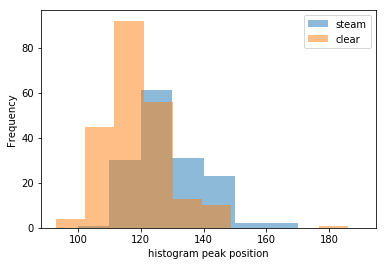

In [67]:
bins=np.arange(100,200, 10)
hmax = steam['hmax'].plot.hist(alpha=0.5, bins=bins, label='steam')
clear['hmax'].plot.hist(ax=hmax, alpha=0.5, label='clear')
hmax.set_xlabel('histogram peak position')
hmax.legend(loc='best')